# Introduction

This notebook contains the code used to process the single-cell RNASeq data from Jerby-Arnon *et al.*. The data was downloaded from GEO (GSE115978) and some additional clinical metadata from the supplementary data of the corresponding manuscript.

In [72]:
working_directory <- "/home/jupyter-jg/Jerby-Arnon analysis"

if (dir.exists(working_directory)) {
    setwd(working_directory)
} else {
    warn(working_directory, " does not exist. Not changing working directory.")
}

# load the required libraries
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(data.table))

# Extract the B cells

The first part of this workflow only extracts the B cells from the data published by Jerby-Arnon *et al.*.

## Load the data

In [2]:
message("Loading data...", appendLF = F)
exprs_data <- fread("data/GSE115978_counts.csv.gz")
colnames(exprs_data)[1] <- "symbol"

message("Converting to matrix...", appendLF = F)
exprs_matrix <- as.matrix(exprs_data[, !c("symbol")])
rownames(exprs_matrix) <- exprs_data$symbol

rm(exprs_data)

Loading data...
Converting to matrix...


Load the sample annotations:

In [3]:
# add the sample data
sample_data <- read.csv("data/GSE115978_cell.annotations.csv.gz")

# add the supplementary patient information
pat_data <- read.csv("data/GSE115978_patient_annotations.csv", sep = "\t")
pat_data$Sample <- gsub("Mel129PA", "Mel129pa", pat_data$Sample)
pat_data$Sample <- gsub("Mel129PB", "Mel129pb", pat_data$Sample)

# make sure the annotations match
if (!all(sample_data$samples %in% pat_data$Sample)) {
    stop("Missing sample annotations")
}

# merge the patient data with the cell specific annotations
sample_data <- merge(sample_data, pat_data, by.x = "samples", by.y = "Sample", all.x = T, all.y = F)
rm(pat_data)

# use the cell id as rowname
rownames(sample_data) <- sample_data$cells
sample_data$cells <- NULL

# make sure all cell types have annotations
if (!all(colnames(exprs_matrix) %in% rownames(sample_data))) {
    stop("Missing annotations for sample data")
}

# sort the sample.data
sample_data <- sample_data[colnames(exprs_matrix), ]

Create the Seurat object:

In [4]:
# create the Seurat object
jerby <- CreateSeuratObject(counts = exprs_matrix,
                            project = "Jerby-Armon",
                            names.delim = " ",
                            meta.data = sample_data)

rm(sample_data)
rm(exprs_matrix)

saveRDS(jerby, "data/jerby_loaded.rds")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


## Normalise

This workflow follows the new `scTransform` approach introduced in Seurat 3. The complete normalisation, scaling of the data, and selection of highly variable genes is now available in the single `scTransform` function.

In this analysis, we correct for the two potential confounding factors, the patient and the cohort.

In [5]:
message("Loading data...", appendLF = F)
jerby <- readRDS("data/jerby_loaded.rds")

# correct for confounders
message("SCTransfrom...", appendLF = F)
jerby <- SCTransform(jerby, vars.to.regress = c("Patient", "Cohort"))

Loading data...
SCTransfrom...
Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 22162 by 7186

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 7186 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning messa

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning messa

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.m

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.m

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“itera

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit re

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs pro

  |======================================================================| 100%


Found 38 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 22162 genes



  |======================================================================| 100%


Computing corrected count matrix for 22162 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.066561 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out Patient, Cohort

Centering data matrix

Set default assay to SCT



In [6]:
# Run the PCA
jerby <- RunPCA(jerby, verbose = FALSE)

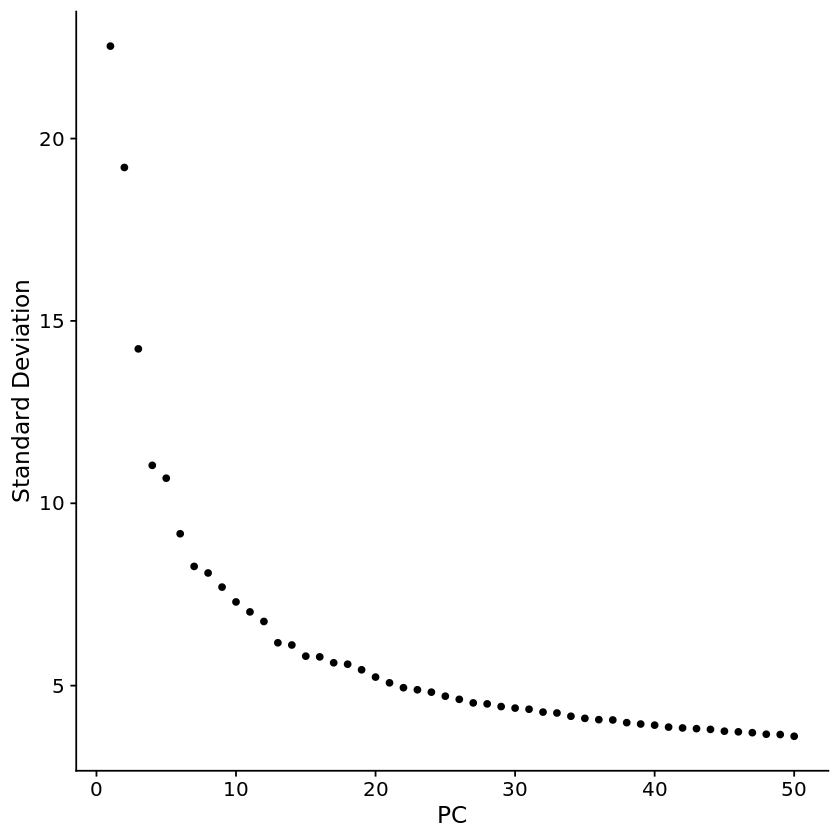

In [7]:
ElbowPlot(jerby, ndims = 50)

Based on the results of the elbow plot, use the first 35 components for the subsequent analyses:

In [8]:
jerby <- RunUMAP(jerby, dims = 1:35, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [9]:
jerby <- FindNeighbors(jerby, dims = 1:35, verbose = FALSE)
jerby <- FindClusters(jerby, verbose = FALSE)

In [10]:
saveRDS(jerby, "data/jerby_processed.rds")

## Get B cells

Clusters representing B cells are identified based on their expression of CD19, MS4A1 (CD20), CD79A, and SDC1 (CD138).

In [73]:
message("Loading data...", appendLF = F)
jerby <- readRDS("data/jerby_processed.rds")

Loading data...


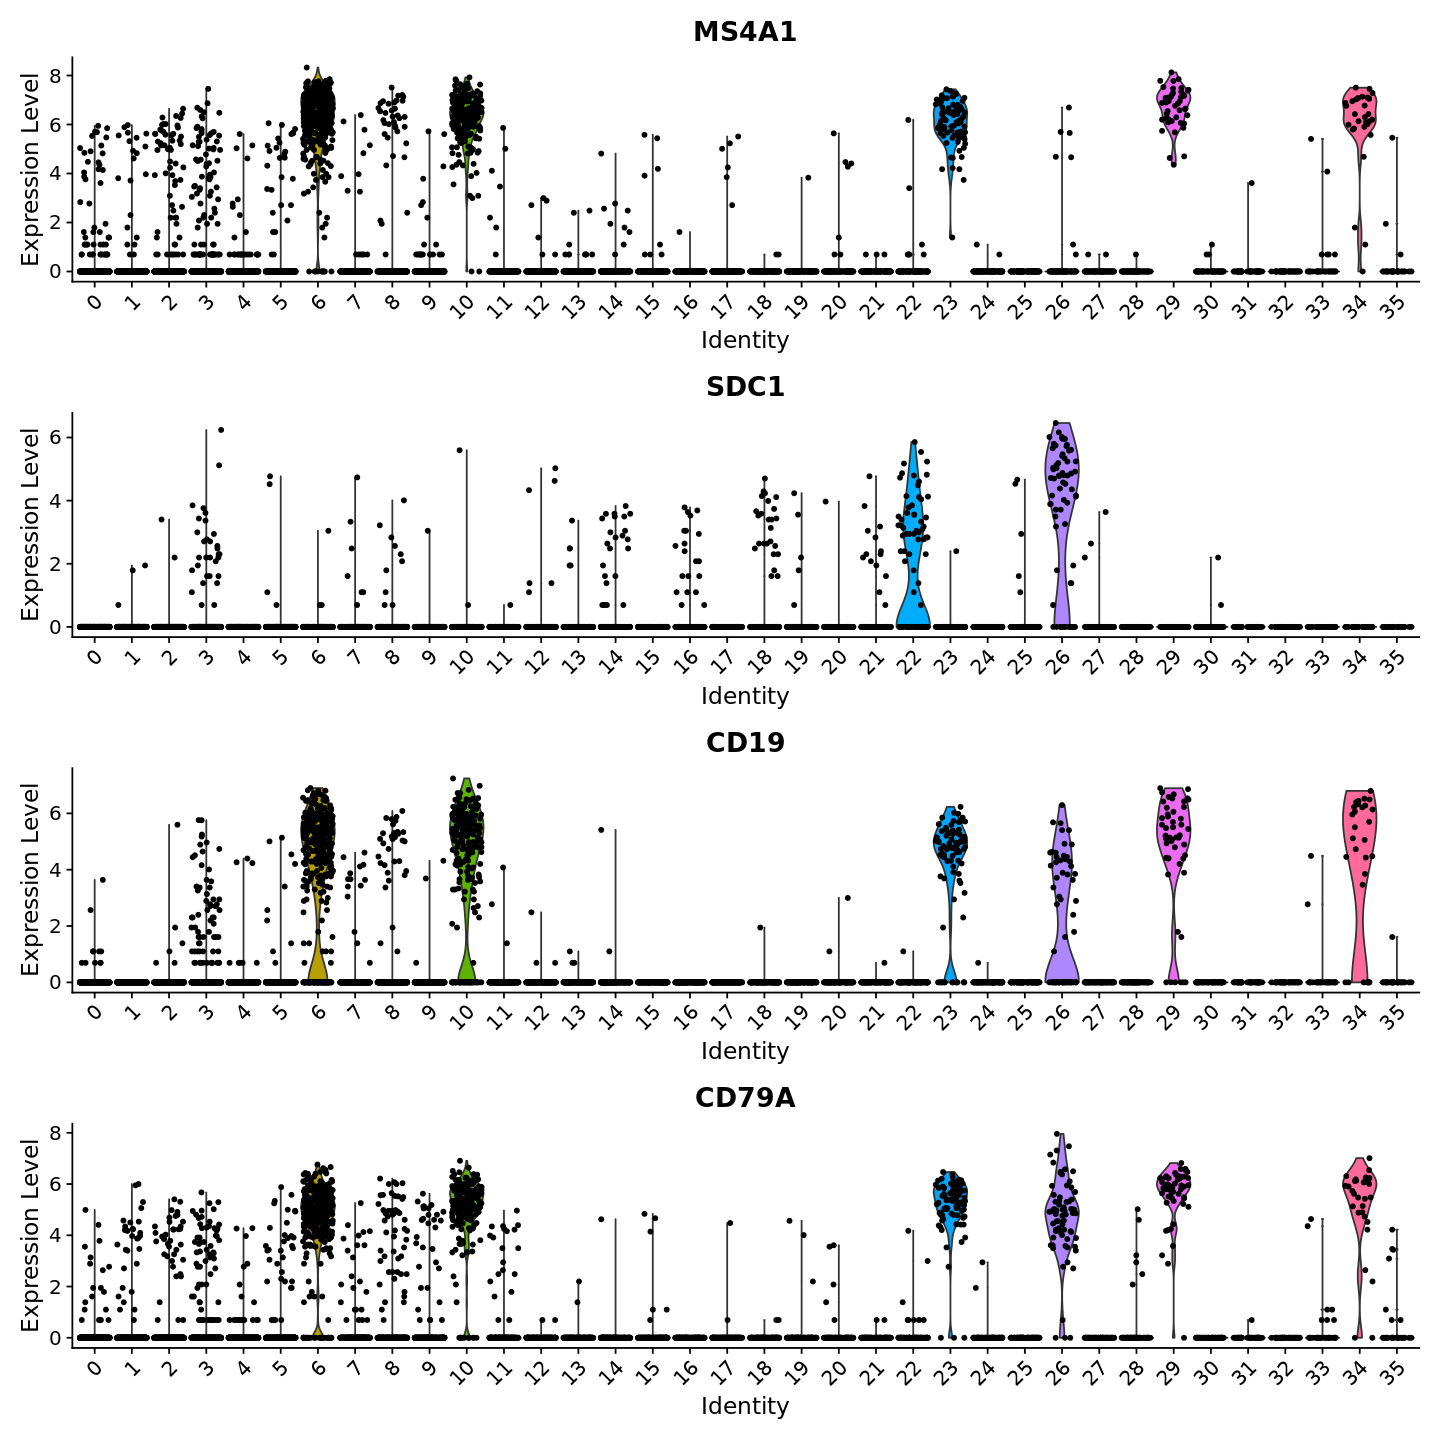

In [74]:
options(repr.plot.width = 12, repr.plot.height = 12)
VlnPlot(jerby, features = c("MS4A1", "SDC1", "CD19", "CD79A"), ncol = 1)

In [75]:
b_cell_clusters <- c(6, 10, 22, 23, 26, 29, 34)
b_cells <- subset(jerby, idents = b_cell_clusters)

After the B cells are extracted from the orginal dataset, the complete workflow is repeated using B cells only:

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 17931 by 920

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 920 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“itera

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs pro

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.m

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning messa

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fi

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“itera

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.m

  |======================================================================| 100%


Found 50 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 17931 genes



  |======================================================================| 100%


Computing corrected count matrix for 17931 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 36.49895 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out Patient, Cohort

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  HLA-DRA, CD69, CXCR4, SELL, TXNIP, FCRLA, CD22, TCL1A, WDFY4, FAM65B 
	   LTB, PTPN6, RHOH, CIITA, TTN, SASH3, CXCR5, HLA-DMB, GPR183, KIAA1551 
	   PAX5, CD19, INPP5D, FCRL1, NAPSB, HVCN1, HMHA1, CR2, FCER2, CD83 
Negative:  P4HB, KDELR2, HDLBP, CD63, HSP90B1, ANXA2, ANXA5, CALU, SPARC, COL1A2 
	   COL1A1, LDHA, DSTN, ARF4, LMNA, TIMP1, CALD1, FSTL1, HSPA5, PPIB 
	   CD59, MAP1B, SEC61A1, PTRF, COL6A3, CNN3, CTTN, IGFBP7, VIM, LGALS1 
PC_ 2 
Positive:  CALD1, COL1A1, COL1A2, SPARC, BGN, COL3A1, FSTL1, IFITM3, COL6A3, IGFBP7 
	   CYBRD1, DCN, C1S, NNMT, THY1, CYR61, CTSK, CNN3, PCOLCE, LUM 
	   SERPING1, MXRA8, VCAN, TAGLN, ISLR, TIMP1, MAP1B, TUBA1A, PTRF, COL6A1 
Negative:  RGS1, SRGN, RPN2, VCP, CANX, PRD

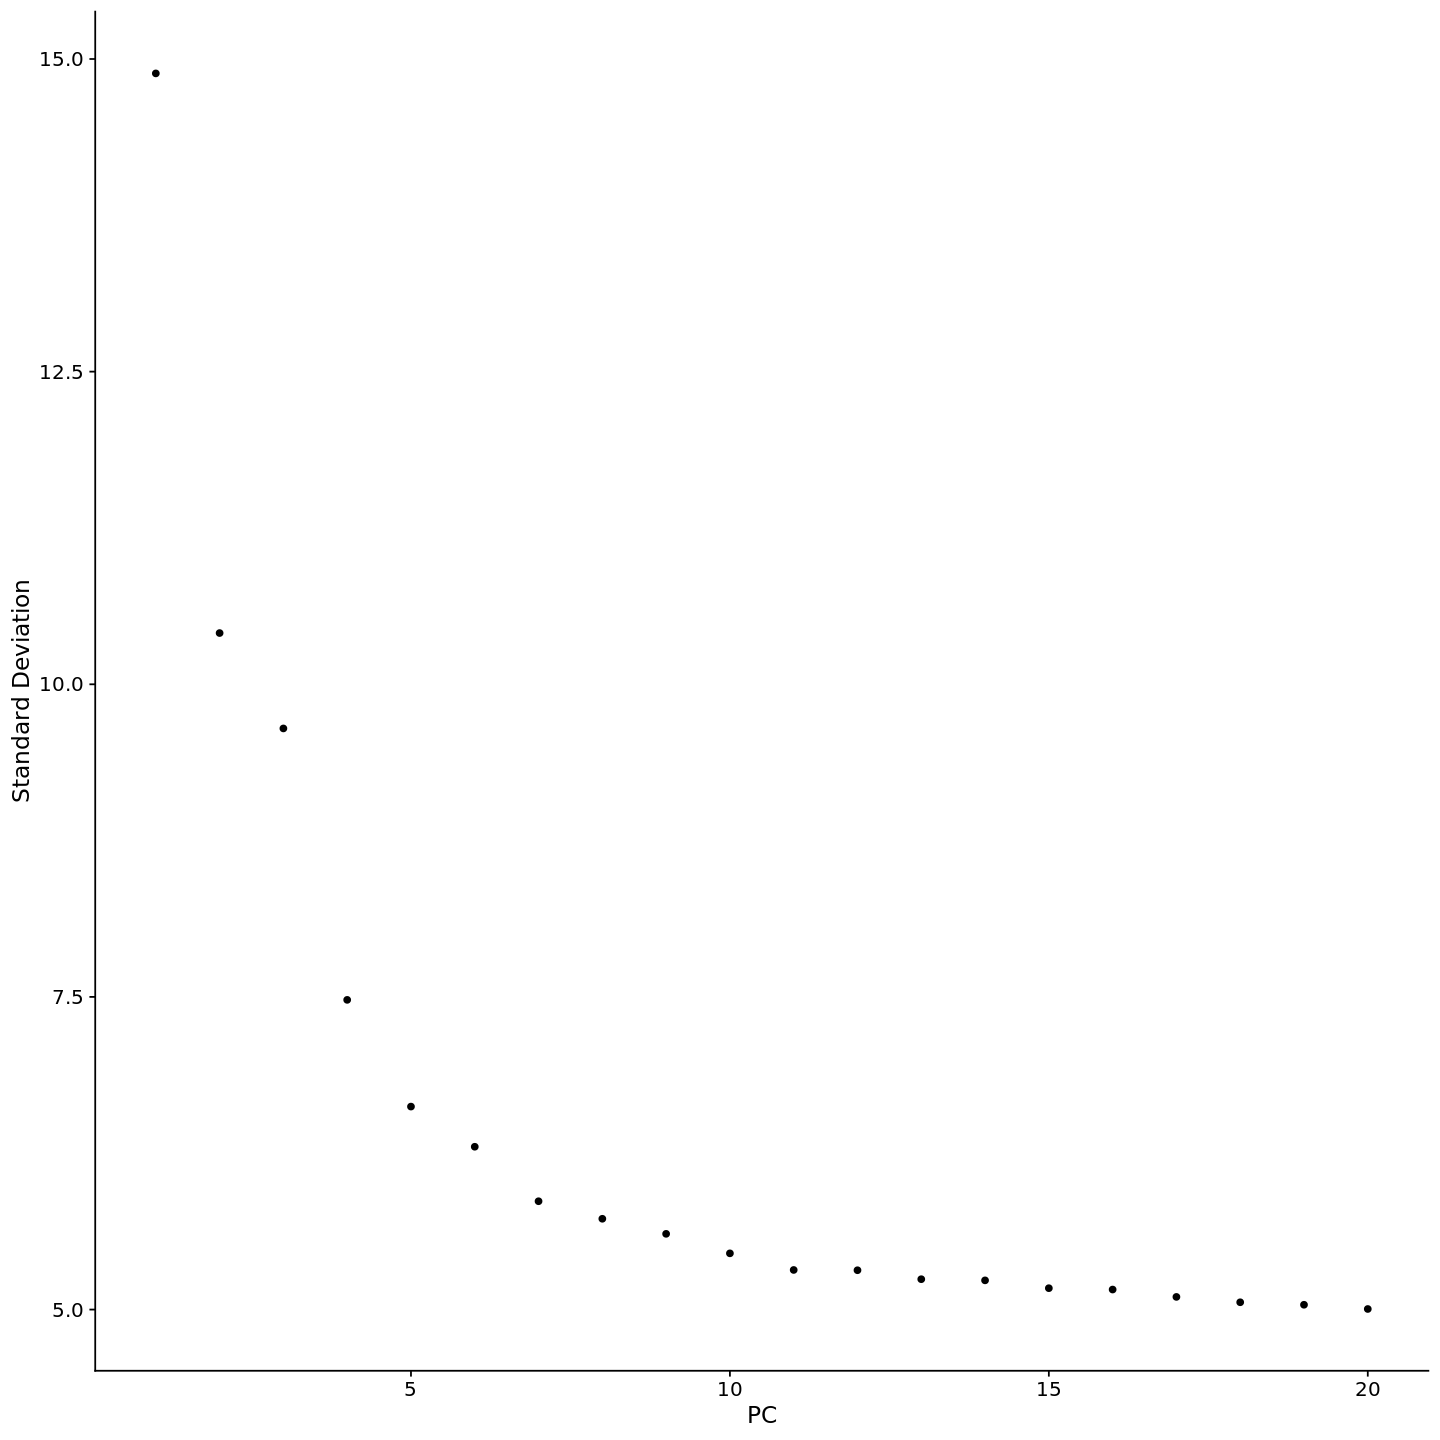

In [76]:
b_cells <- SCTransform(b_cells, vars.to.regress = c("Patient", "Cohort"))
b_cells <- RunPCA(b_cells)

ElbowPlot(b_cells)

Based on the elbow plot, the first 11 components are used for the subsequent analyses.

In [77]:
b_cells <- RunUMAP(b_cells, dims = 1:11, verbose = FALSE)

Cluster resolution is chosen to create a comparably large number of clusters in order to identify all potential B cell subtypes.

In [78]:
b_cells <- FindNeighbors(b_cells, dims = 1:11, verbose = FALSE)
b_cells <- FindClusters(b_cells, verbose = FALSE, resolution = 1.5)

B cell subtypes are identified based on canonical B cell markers following the approach Sanz *et al.* (2019).

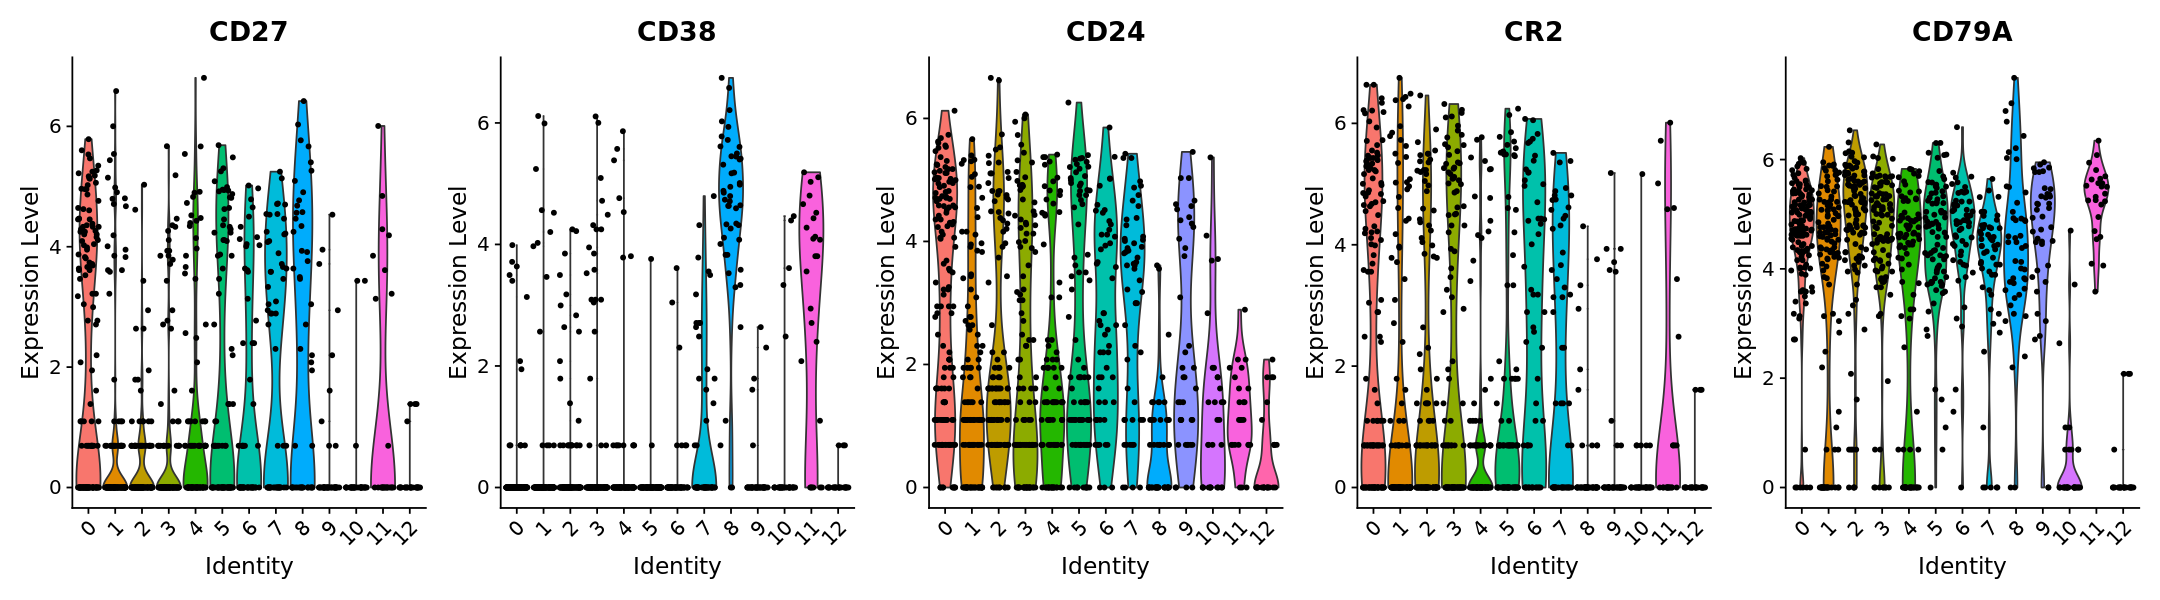

In [79]:
options(repr.plot.height = 5, repr.plot.width = 18)
# CR2 = CD21
# CD79A = IgA
VlnPlot(b_cells, c("CD27", "CD38", "CD24", "CR2", "CD79A"), ncol = 5)

To further identify plasma cells and differentiate them from the plasmablast-like B cells we previously described we further use the expression of SDC1 (CD138) and MS4A1 (CD20). 

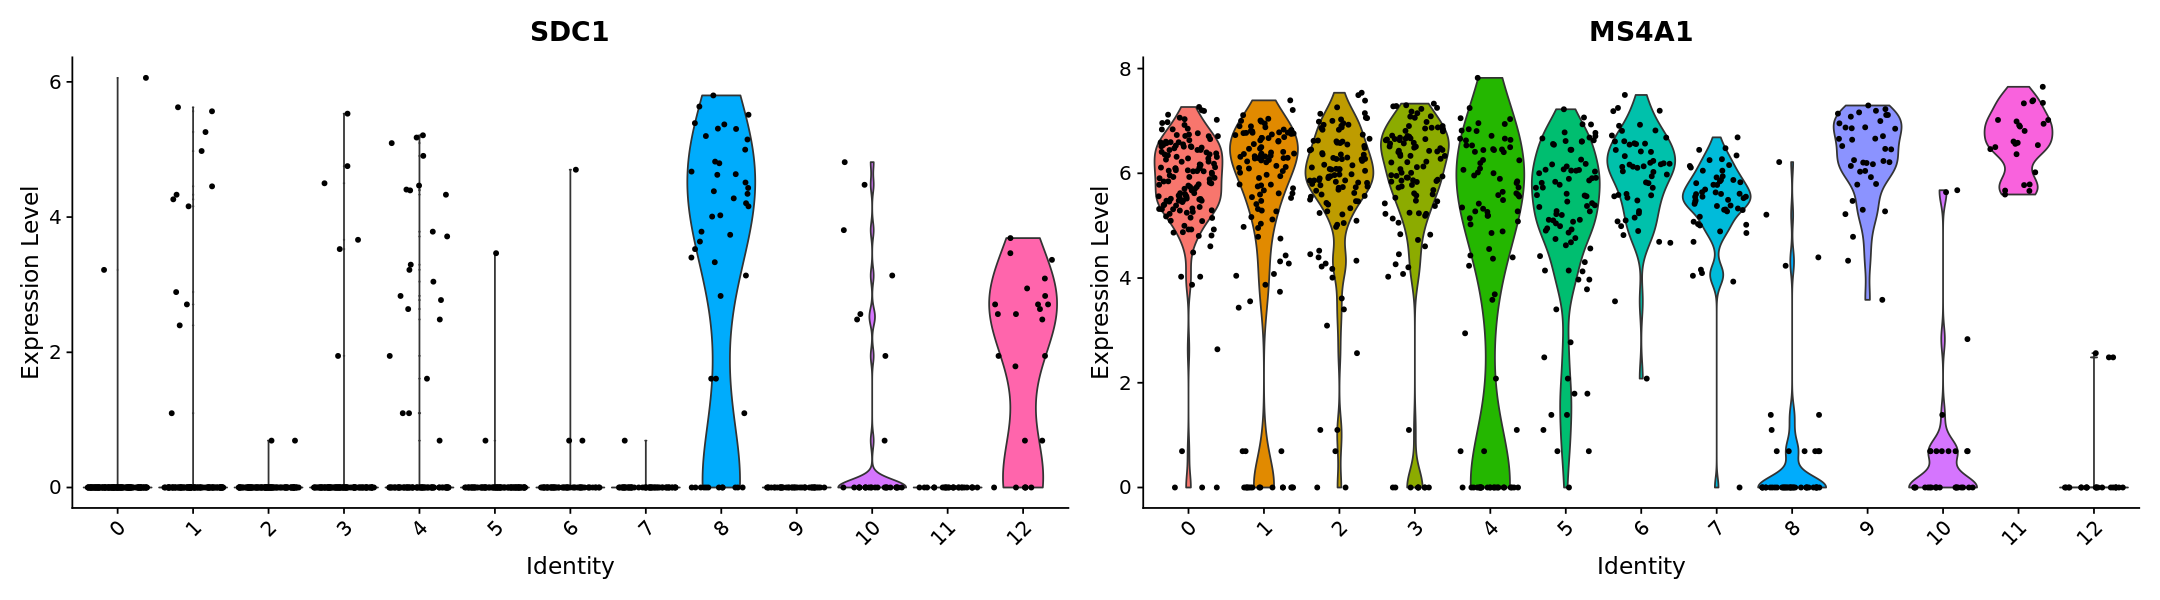

In [80]:
VlnPlot(b_cells, c("SDC1", "MS4A1"), ncol = 2)

Cluster "8" and "12" are SDC1 (CD138) positive and therefore represent plasma cell-like B cells. 
Cluster "8" also expresses low-levels of MS4A1 (CD20). Therefore, these cells seem to be somewhere between activated B cells and plasma cells. Therefore, we classified these cells as our previously described plasmablast-like B cells.

**Note**: Cluster numbers in the plots above are 0-based

In [81]:
# stash the original cluster ides in the "Clusters" slot and replace with the identified B cell subtypes
b_cells[["Clusters"]] <- Idents(b_cells)

cell_types <- c("Memory 0", "Naive", "Memory 1", "Memory 2", "Memory 3", "Memory 4", "Memory 5", 
                "Memory switched resting", "Plasmablast", "Memory 6", "Double negative", 
                "Memory switch activated", "Plasma cell")

names(cell_types) <- levels(b_cells)

cell_types

0                         1                         2 
               "Memory 0"                   "Naive"                "Memory 1" 
                        3                         4                         5 
               "Memory 2"                "Memory 3"                "Memory 4" 
                        6                         7                         8 
               "Memory 5" "Memory switched resting"             "Plasmablast" 
                        9                        10                        11 
               "Memory 6"         "Double negative" "Memory switch activated" 
                       12 
            "Plasma cell"

In [82]:
# update the primary identification based on the new cell types
new_cell_ids <- plyr::mapvalues(Idents(b_cells), 
                                from = names(cell_types), 
                                to = as.character(cell_types))

Idents(b_cells) <- new_cell_ids

png 
  2

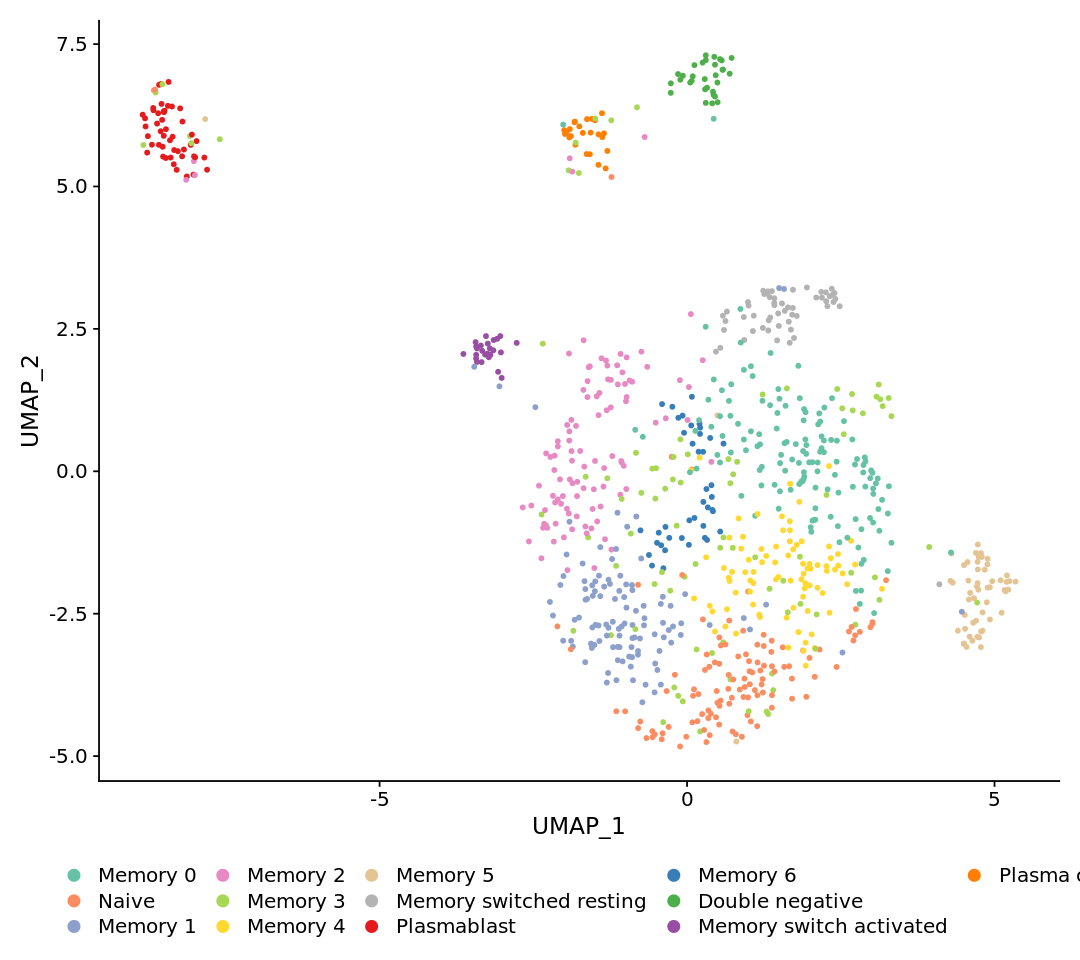

In [83]:
# manually set the color in order to ensure that the clusters can be differentiated
colours <- c(RColorBrewer::brewer.pal(n = 8, "Set2"), RColorBrewer::brewer.pal(n = 9, "Set1"))

options(repr.plot.height = 8, repr.plot.width = 9)
plot_obj <- DimPlot(b_cells, label = F) + # + NoLegend()
    ggplot2::scale_color_manual(values = colours) +
    ggplot2::theme(legend.position="bottom")

svg("Jerby_b_cells-UMAP.svg", width = 9, height = 8)
print(plot_obj)
dev.off()

print(plot_obj)

IgG+ plasma cells were shown to express a non-functional B cell receptor (https://doi.org/10.1182/blood-2012-09-459289). Therefore, we approximated IgG expression through Fc fragment of IgG receptor and transporter (FCGRT):

png 
  2

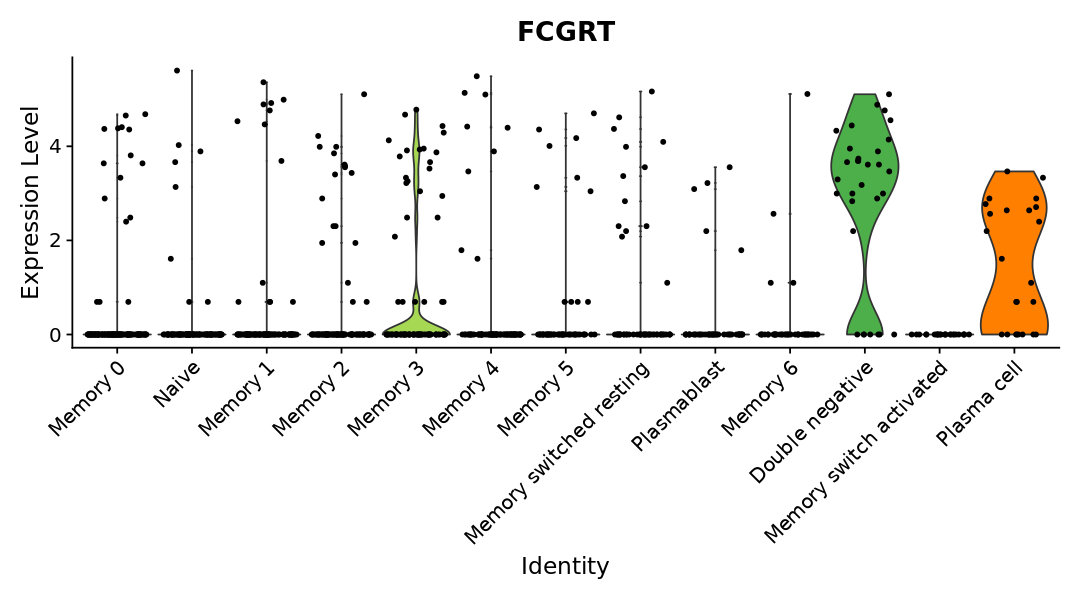

In [84]:
options(repr.plot.height = 5, repr.plot.width = 9)
plot_obj <- VlnPlot(b_cells, c("FCGRT"), ncol = 1, col = colours) + NoLegend()

svg("Jerby_b_cells-FCGRT.svg", width = 9, height = 5)
print(plot_obj)
dev.off()

print(plot_obj)

# ReactomeGSA

After the B cells were extracted and the respective B cell clusters identified, we can now use ReactomeGSA's `analyse_sc_clusters` function to perform the pathway analysis.

In [85]:
library(ReactomeGSA)

ReactomeGSA's `analyse_sc_clusters` function automatically takes care of all required steps to perform the pathway analysis:

  1. Calculate the average expression per cluster
  2. Perform a ssGSEA gene set variation analysis using ReactomeGSA
  3. Return the final `ReactomeGSAResult` object

In [86]:
gsa_result <- analyse_sc_clusters(b_cells, verbose = TRUE)
gsa_result

Calculating average cluster expression...

Converting expression data to string... (This may take a moment)

Conversion complete

Submitting request to Reactome API...

Compressing request data...

Reactome Analysis submitted succesfully

Converting dataset Seurat...

Mapping identifiers...

Performing gene set analysis using ssGSEA

Analysing dataset 'Seurat' using ssGSEA

Retrieving result...



ReactomeAnalysisResult object
  Reactome Release: 72
  Results:
  - Seurat:
    1718 pathways
    12864 fold changes for genes
  No Reactome visualizations available

In [87]:
saveRDS(gsa_result, "jerby_b_cells_gsa_result.rds")

The `pathways` function returns a data.frame with the columns representing the clusters and each row a pathway.

In [88]:
gsa_pathways <- pathways(gsa_result)

gsa_pathways[1:3, 1:3]

,Name,Double.negative.Seurat,Memory.0.Seurat
,<chr>,<dbl>,<dbl>
R-HSA-1059683,Interleukin-6 signaling,0.1309370,0.09702442
R-HSA-109606,Intrinsic Pathway for Apoptosis,0.1205805,0.11404028
R-HSA-109703,PKB-mediated events,0.1278737,0.18936784


A simple approach to find the most interesting pathways is to evaluatet the maximum expression difference for each pathway.

In [89]:
# find the maximum differently expressed pathway
max_diff <- do.call(rbind, apply(gsa_pathways, 1, function(row) {
    values <- as.numeric(row[2:length(row)])
    return(data.frame(name = row[1], min = min(values), max = max(values)))
}))

max_diff$diff <- max_diff$max - max_diff$min
max_diff <- max_diff[order(max_diff$diff, decreasing = T), ]

In [90]:
max_diff[1:30,]

,name,min,max,diff
,<fct>,<dbl>,<dbl>,<dbl>
R-HSA-389542,NADPH regeneration,-0.41130670,0.431763865,0.8430706
R-HSA-8964540,Alanine metabolism,-0.50509488,0.287147558,0.7922424
R-HSA-140180,COX reactions,-0.46811464,0.267634585,0.7357492
R-HSA-5263617,Metabolism of ingested MeSeO2H into MeSeH,-0.15682990,0.494905124,0.6517350
R-HSA-9636003,NEIL3-mediated resolution of ICLs,-0.49321399,0.127188389,0.6204024
R-HSA-9025046,NTF3 activates NTRK2 (TRKB) signaling,-0.31814581,0.239532461,0.5576783
R-HSA-3248023,Regulation by TREX1,-0.08092376,0.453558597,0.5344824
R-HSA-166020,Transfer of LPS from LBP carrier to CD14,-0.21855970,0.290760535,0.5093202
R-HSA-141334,PAOs oxidise polyamines to amines,-0.41897138,0.089747730,0.5087191


The `plot_gsva_pathway` function plots the expression of a single pathway accross the different cell types.

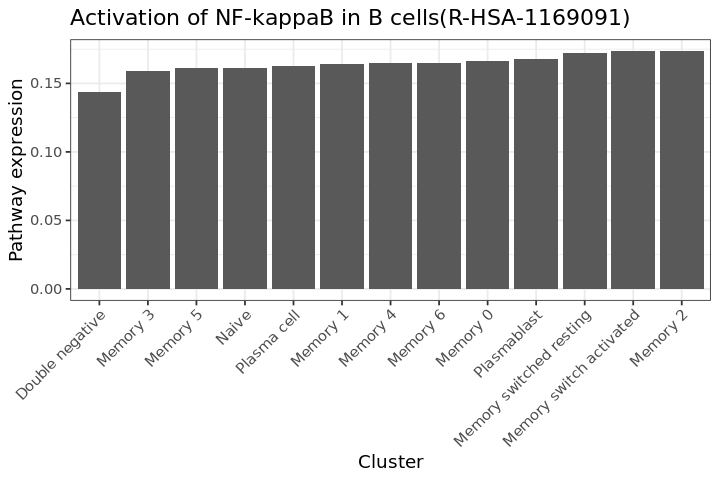

In [91]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot_obj <- plot_gsva_pathway(gsa_result, "R-HSA-1169091")

print(plot_obj)

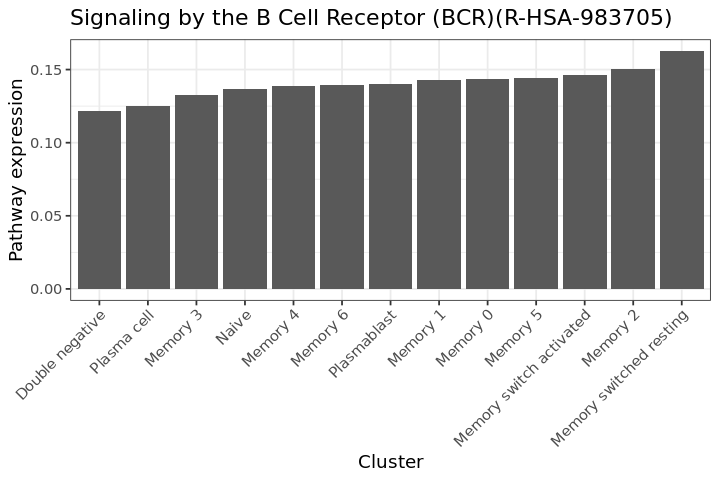

In [92]:
plot_gsva_pathway(gsa_result, "R-HSA-983705")

The `plot_gsva_heatmap` function is an intuitive way to show differences of multiple pathways accross all cell clusters / types.

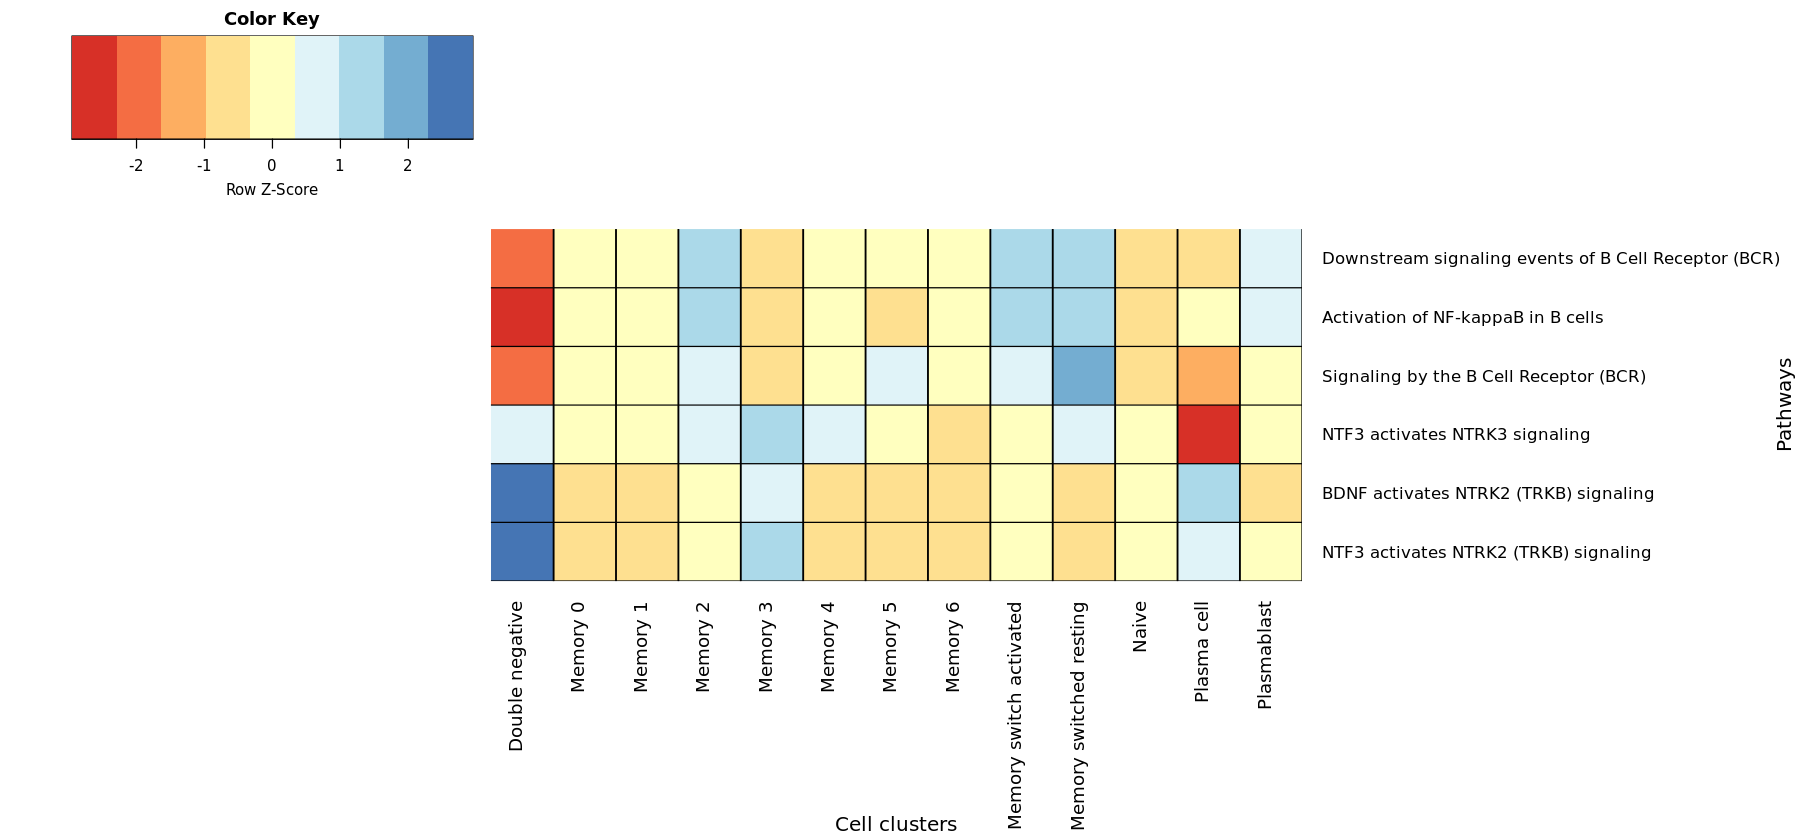

In [95]:
selected_pathways <- c(
                       "R-HSA-1169091", "R-HSA-1168372", "R-HSA-983705", # BCR signalling
                       "R-HSA-9034013", "R-HSA-9024909", "R-HSA-9025046" # NTRK3 associated pathways 
                       )

# sort the cells aplhabetically in the pathway result
org_cols <- colnames(gsa_result@results[[1]]$pathways)
org_cols <- c(org_cols[1:2], sort(org_cols[3:length(org_cols)]))

gsa_result@results[[1]]$pathways <- gsa_result@results[[1]]$pathways[, org_cols]

# replace the "." from the cell names
colnames(gsa_result@results[[1]]$pathways) <- gsub("\\.", " ", colnames(gsa_result@results[[1]]$pathways))

# display the heatmap
options(repr.plot.width = 15, repr.plot.height = 7)
plot_gsva_heatmap(gsa_result, truncate_names = F, pathway_ids = selected_pathways, 
                  dendrogram = "none", 
                  rowsep = 1:length(selected_pathways), colsep = 1:13, sepcolor = "black", sepwidth = c(0.01, 0.0001),
                  scale = "row",
                  margins = c(13, 25),
                  cexRow = 1,
                  xlab = "Cell clusters",
                  ylab = "Pathways",
                  Colv = F)

In [96]:
# create plot for manuscript
svg("Jerby_b_cells_heatmap.svg", width = 15, height = 7)
plot_gsva_heatmap(gsa_result, truncate_names = F, pathway_ids = selected_pathways, 
                  dendrogram = "none", 
                  rowsep = 1:length(selected_pathways), colsep = 1:13, sepcolor = "black", sepwidth = c(0.01, 0.0001),
                  scale = "row",
                  margins = c(13, 25),
                  cexRow = 1,
                  xlab = "Cell clusters",
                  ylab = "Pathways",
                  Colv = F)
dev.off()

png 
  2

# Session Info


In [98]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ReactomeGSA_1.1.3 data.table_1.12.8 Seurat_3.1.4     

loaded via a namespace (and not attached):
  [1] TH.data_1.0-10      Rtsne_0.15          colorspace_1.4-1   
  [4] ellipsis_0.3.0      ggridges_0.5.2      IRdisplay_0.7.0    
  [7] base64enc_0.1-3     leiden_0